In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [2]:
s,p,q,sd,pd,qd,u = symbols('sigma,p,q,sigmadot,pdot,qdot,u')
diffmap = {s:sd,p:pd,q:qd}

def genfgseries(N):
    fn = s/s
    gn = 0*s
    fs = [fn]
    gs = [gn]
    for j in range(N):
        print(j)
        fnp1 = difftotal(fn,t,diffmap) - s*gn
        gnp1 = fn + difftotal(gn,t,diffmap)
        fn = fnp1
        gn = gnp1
        fn = simplify(fn.subs(([sd,-3*s*p],[pd,q-2*p**2],[qd,-p*(s+2*q)])))
        gn = simplify(gn.subs(([sd,-3*s*p],[pd,q-2*p**2],[qd,-p*(s+2*q)])))
        fs.append(fn)
        gs.append(gn)
    return fs,gs

In [3]:
fs,gs = genfgseries(8)

0
1
2
3
4
5
6
7


In [4]:
for f in fs:
    display(f)

In [5]:
for g in gs:
    display(g)

In [6]:
dt = symbols("\Delta{t}")

In [7]:
fseries = 0
for j in range(len(fs)):
    fseries = fseries + dt**j/factorial(j)*fs[j]

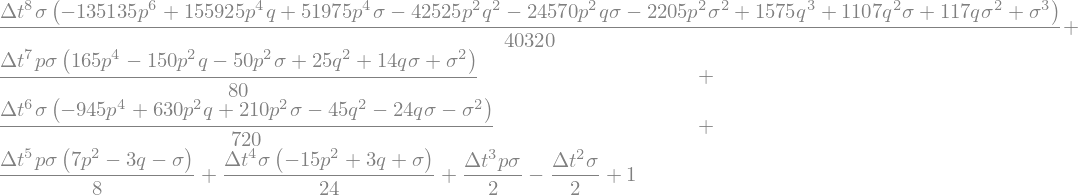

In [8]:
fseries

In [9]:
gseries = 0
for j in range(len(gs)):
    gseries = gseries + dt**j/factorial(j)*gs[j]

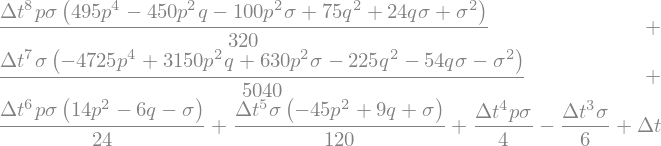

In [10]:
gseries

In [11]:
fdotseries = 0
for j in range(1,len(fs)):
    fdotseries = fdotseries + dt**(j-1)/factorial(j-1)*fs[j]

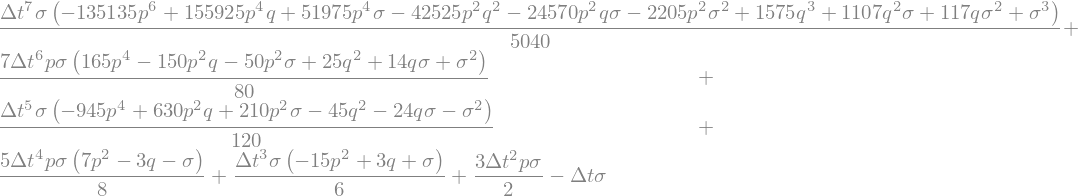

In [12]:
fdotseries

In [13]:
gdotseries = 0
for j in range(1,len(gs)):
    gdotseries = gdotseries + dt**(j-1)/factorial(j-1)*gs[j]

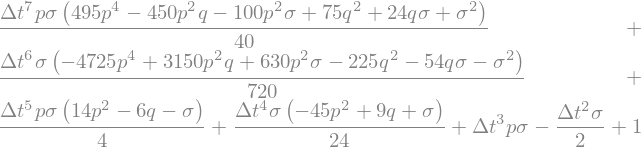

In [14]:
gdotseries

output for MATLAB

In [15]:
from sympy.utilities.codegen import codegen

In [16]:
dtboring = symbols("dt")

In [17]:
print(codegen([("fseries", fseries.subs(dt,dtboring).as_ordered_terms()[::-1]),
               ("gseries", gseries.subs(dt,dtboring).as_ordered_terms()[::-1]),
               ("fdotseries", fdotseries.subs(dt,dtboring).as_ordered_terms()[::-1]),
               ("gdotseries", gdotseries.subs(dt,dtboring).as_ordered_terms()[::-1])],
               language="Octave")[0][1])

function [out1, out2, out3, out4, out5, out6, out7, out8] = fseries(dt, p, q, sigma)
  %FSERIES  Autogenerated by sympy
  %   Code generated with sympy 1.5.1
  %
  %   See http://www.sympy.org/ for more information.
  %
  %   This file is part of 'project'

  out1 = 1;
  out2 = -dt.^2.*sigma/2;
  out3 = dt.^3.*p.*sigma/2;
  out4 = dt.^4.*sigma.*(-15*p.^2 + 3*q + sigma)/24;
  out5 = dt.^5.*p.*sigma.*(7*p.^2 - 3*q - sigma)/8;
  out6 = dt.^6.*sigma.*(-945*p.^4 + 630*p.^2.*q + 210*p.^2.*sigma - 45*q.^2 - 24*q.*sigma - sigma.^2)/720;
  out7 = dt.^7.*p.*sigma.*(165*p.^4 - 150*p.^2.*q - 50*p.^2.*sigma + 25*q.^2 + 14*q.*sigma + sigma.^2)/80;
  out8 = dt.^8.*sigma.*(-135135*p.^6 + 155925*p.^4.*q + 51975*p.^4.*sigma - 42525*p.^2.*q.^2 - 24570*p.^2.*q.*sigma - 2205*p.^2.*sigma.^2 + 1575*q.^3 + 1107*q.^2.*sigma + 117*q.*sigma.^2 + sigma.^3)/40320;

end

function [out1, out2, out3, out4, out5, out6, out7] = gseries(dt, p, q, sigma)

  out1 = dt;
  out2 = -dt.^3.*sigma/6;
  out3 = dt.^4.*p.*sigma/4;